In [1]:
import os, sys
import pandas as pd
import numpy as np

from utils.method import read_bic_table, make_consensus_biclusters, write_bic_table
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
in_dir = "results_on_real_data_WGCNA/" 
out_dir = "results_on_real_data_tuned_parameters/"

seeds = [116739,26225,288389,670487,777572]
suffix = ".bin=kmeans,pval=0.01,clust=WGCNA,ds=0,dch=0.995" # max average % of matched biclusters
dataset = "METABRIC"  #"METABRIC" # "TCGA"

exprs = pd.read_csv("data/preprocessed_v6/METABRIC_1904_17Kgenes.log2_exprs_z_v6.tsv", sep="\t",index_col=0)
#exprs = pd.read_csv("data/preprocessed_v6/TCGA-BRCA_1079_17Kgenes.Xena_TCGA_PanCan.log2_exprs_z_v6.tsv", sep="\t",index_col=0)

In [3]:
biclusters = []
for seed in seeds:
    df = read_bic_table(in_dir+dataset+".seed="+str(seed)+suffix+".biclusters.tsv")
    df = df.drop_duplicates(subset =  ["n_genes","n_samples","SNR","e_pval","direction"])
    print("seed %s n biclusters: %s"%(seed,df.shape[0]))
    df.index = ["seed="+str(seed)+"_"+str(x) for x in df.index.values ]
    
    biclusters.append(df)
biclusters = pd.concat(biclusters)


seed 116739 n biclusters: 48
seed 26225 n biclusters: 47
seed 288389 n biclusters: 47
seed 670487 n biclusters: 50
seed 777572 n biclusters: 52


/home/olya/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


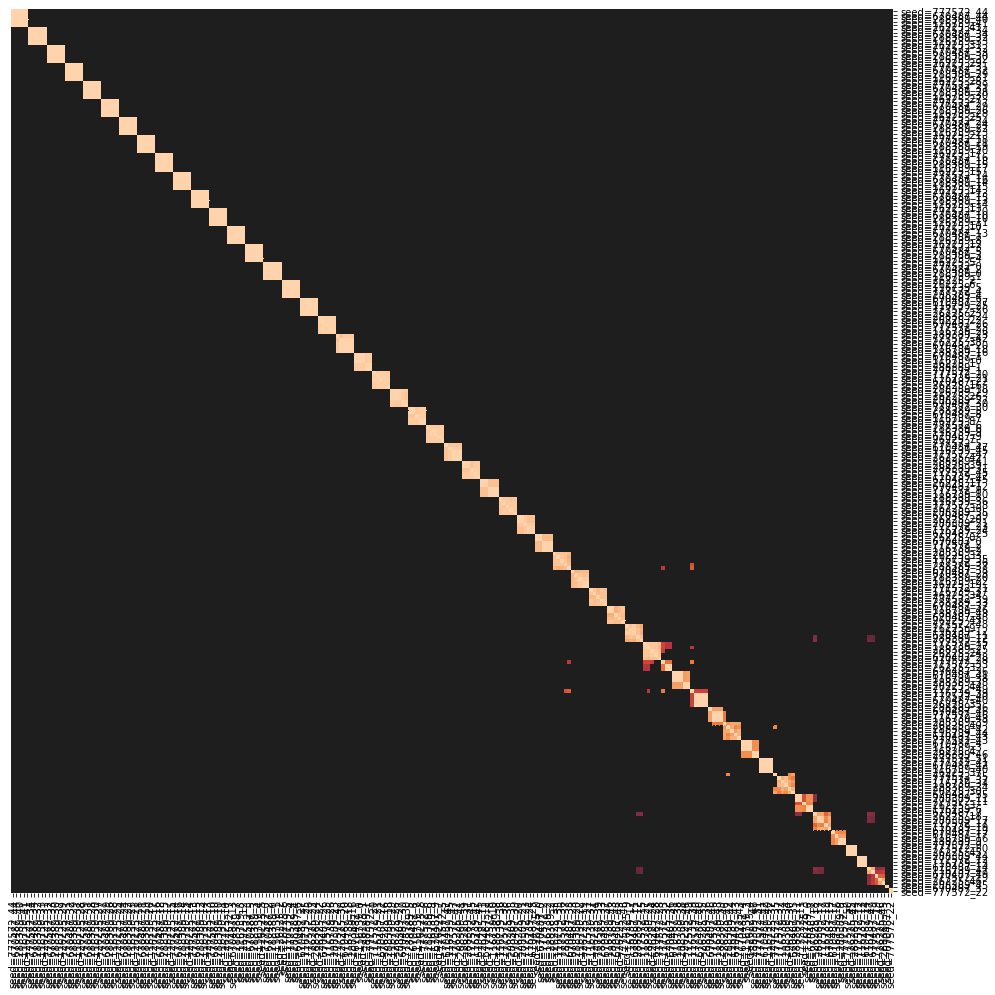

	Running Louvain ...
	curve type: increasing


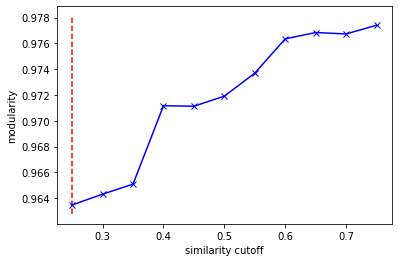

	Louvain runtime: modules detected in 0.33 s.
	modules: 49, not clustered features 2 
		similarity cutoff: 0.25 modularity: 0.963
biclusters found in 2+ runs: 49 in less then 2 runs: 2


In [4]:
consensus_biclusters = make_consensus_biclusters(biclusters, exprs, 
                                                      method = "kmeans",
                                                      similarity = "both", ## "samples", "genes" ,"both"
                                                      seed = 42,plot = True)
write_bic_table(consensus_biclusters,out_dir+dataset+".consensus_kmeans_v2"+str(seed)+suffix+".tsv")

In [5]:
# neuro-endocrine subtype
consensus_biclusters[consensus_biclusters["genes"].apply(lambda x: "CHGA" in x)]

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times
4,2.367502,94,94,"{GNAO1, PHACTR3, CEACAM5, APLP1, PPM1E, CELSR3...","{MB-4213, MB-0184, MB-5370, MB-0244, MB-4820, ...","{GNAO1, PHACTR3, CEACAM5, APLP1, PPM1E, SCAMP5...",{},"{10769, 1553, 1044, 9752, 7195, 1055, 10792, 1...","{1026, 1543, 10, 18, 21, 1048, 28, 1094, 75, 1...",UP,5


In [6]:
consensus_biclusters.loc[consensus_biclusters["detected_n_times"]==1,:]

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times
1,2.595970,2,130,"{CYP2A7, CYP2A6}","{MB-4213, MB-6124, MB-0184, MB-5215, MB-4222, ...","{CYP2A7, CYP2A6}",{},"{3532, 3533}","{1025, 1537, 516, 1543, 519, 8, 10, 11, 1552, ...",UP,1
24,1.543321,2,576,"{MT1H, MT1G}","{MB-3165, MB-6124, MB-3452, MB-4993, MB-2994, ...","{MT1H, MT1G}",{},"{9084, 9085}","{1, 2, 4, 5, 7, 11, 17, 18, 19, 20, 21, 23, 24...",UP,1
